In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Feynn Lab/Project 2/mcdonalds.csv')
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
data.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

There are no null values.

Let's Look at the different values in each feature.

In [ ]:
for i in data:
    if data[i].dtypes == 'object':
        print(f'{i}: {data[i].unique()}')

yummy: ['No' 'Yes']
convenient: ['Yes' 'No']
spicy: ['No' 'Yes']
fattening: ['Yes' 'No']
greasy: ['No' 'Yes']
fast: ['Yes' 'No']
cheap: ['Yes' 'No']
tasty: ['No' 'Yes']
expensive: ['Yes' 'No']
healthy: ['No' 'Yes']
disgusting: ['No' 'Yes']
Like: ['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
VisitFrequency: ['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
Gender: ['Female' 'Male']


All these features are categorical, we need to convert to numeric for futher analysis

# Converting categorical to numerical

In [6]:
data.replace({'Yes':1, 'No':0}, inplace=True)
data.replace({'I love it!+5': '+5', 'I hate it!-5':'-5'}, inplace=True)
data['Like'].unique()
data['Like'] = data['Like'].astype(int)

# Exploratory Data Analysis

In [18]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



yummy          0.552650
convenient     0.907777
spicy          0.093599
fattening      0.867171
greasy         0.526497
fast           0.900206
cheap          0.598761
tasty          0.644184
expensive      0.357880
healthy        0.198899
disgusting     0.242946
Like           0.777013
Age           44.604955
dtype: float64

Around 50% people think that the McDonald food is yummy, greasy and cheap.

90% people think it is convenient and fast.

Very few 9% think it is spicy

[]

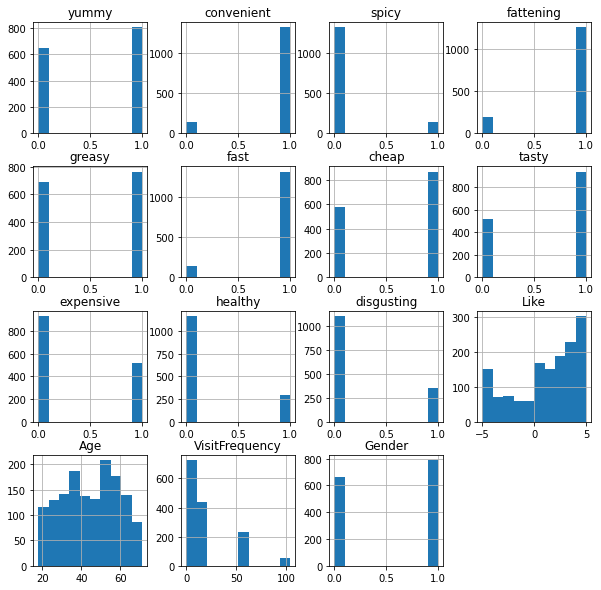

In [ ]:
data.hist(figsize=(10,10))
plt.plot()

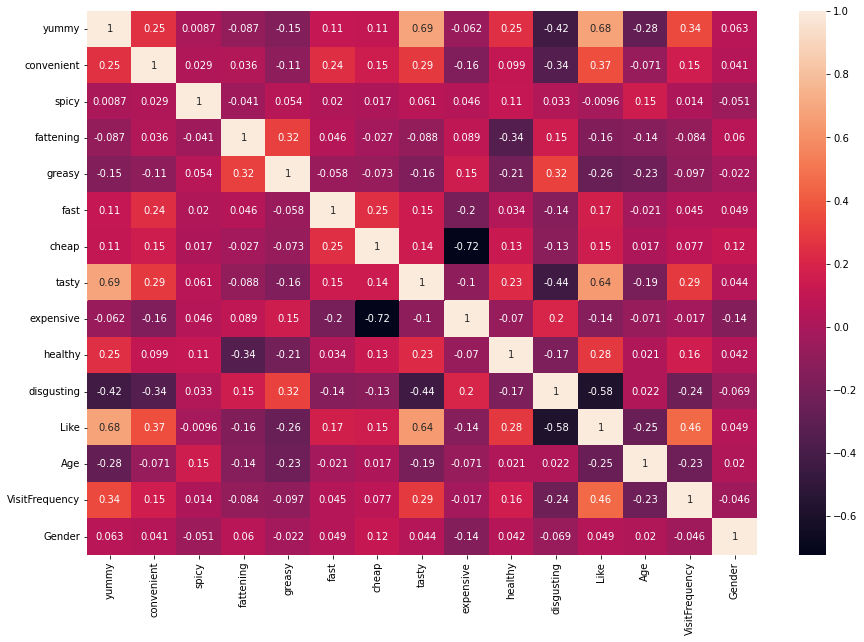

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)

## Principal Component Ananlysis

In [26]:
X = data.iloc[:, 0:11]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yummy       1453 non-null   int64
 1   convenient  1453 non-null   int64
 2   spicy       1453 non-null   int64
 3   fattening   1453 non-null   int64
 4   greasy      1453 non-null   int64
 5   fast        1453 non-null   int64
 6   cheap       1453 non-null   int64
 7   tasty       1453 non-null   int64
 8   expensive   1453 non-null   int64
 9   healthy     1453 non-null   int64
 10  disgusting  1453 non-null   int64
dtypes: int64(11)
memory usage: 125.0 KB


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
Xt= pca.fit_transform(X)

In [9]:
print(pca.explained_variance_)

[0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209]


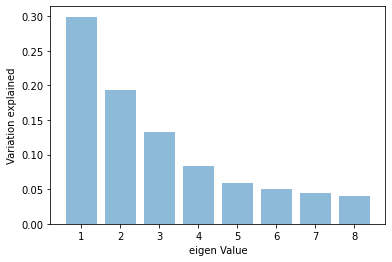

In [10]:
plt.bar(list(range(1,9)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

Plotting 1st two principal components

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


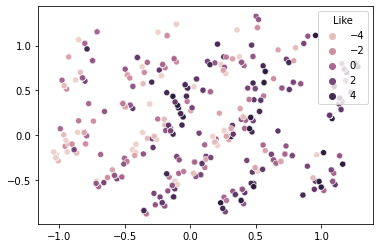

In [11]:
sns.scatterplot(Xt[:,1], Xt[:,2], hue=data['Like'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


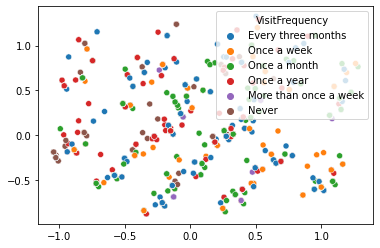

In [12]:
sns.scatterplot(Xt[:,1], Xt[:,2], hue=data['VisitFrequency'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


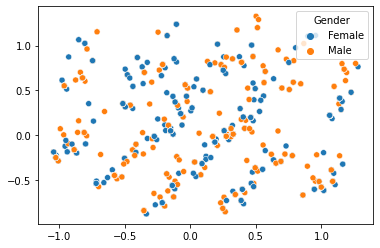

In [13]:
sns.scatterplot(Xt[:,1], Xt[:,2], hue=data['Gender'])

We can see that there is a clear segmentation between, particularly people who like and who do not like McDonalds

## Plotting the loadings

In [14]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [15]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=data['Like'])

for i, feature in enumerate(X.columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

We can see there is a segmentation along price line.

Also the same segment of people who think it is yummy also think it is tasty and convenient.

The segment of people who think it is fattening also think it is greasy and disgusting

# Segmentation

Since all the features are categorical we will use kModes clustering for the segmentation

In [20]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4208.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 4208.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 4208.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 4208.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 4208.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 463, cost: 3491.0
Run 1, iteration: 2/100, moves: 426, cost: 3109.0
Run 1, iteration: 3/100, moves: 149, cost: 3109.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, mov

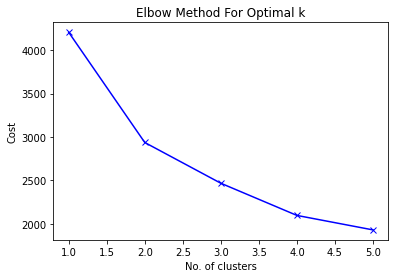

In [21]:

from kmodes.kmodes import KModes
cost = []
K = range(1,6)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

From the elbow graph we can see there are 4 clusters, so we will segment the market into 4 groups

In [22]:
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 169, cost: 2318.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 288, cost: 2361.0
Run 2, iteration: 2/100, moves: 185, cost: 2247.0
Run 2, iteration: 3/100, moves: 12, cost: 2247.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 519, cost: 2328.0
Run 3, iteration: 2/100, moves: 118, cost: 2328.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 144, cost: 2465.0
Run 4, iteration: 2/100, moves: 8, cost: 2465.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 316, cost: 2199.0
Best run was number 5


array([0, 0, 1, ..., 1, 0, 3], dtype=uint16)

In [27]:
X['clusters']=clusters
X.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,clusters
0,0,1,0,1,0,1,1,0,1,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1
3,1,1,0,1,1,1,1,1,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,2


In [28]:
X_cluster = X.groupby(['clusters'])
X_cluster.mean()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
clusters,,,,,,,,,,,
0,0.748379,0.968872,0.098573,0.817121,0.380026,0.952010,0.872892,0.856031,0.063554,0.273671,0.060960
1,0.759450,0.955326,0.092784,0.883162,0.460481,0.841924,0.000000,0.841924,1.000000,0.192440,0.068729
2,0.008811,0.837004,0.083700,0.960352,0.859031,0.933921,0.867841,0.088106,0.070485,0.070485,0.669604
3,0.018293,0.634146,0.085366,0.945122,0.871951,0.713415,0.000000,0.067073,1.000000,0.036585,0.817073
